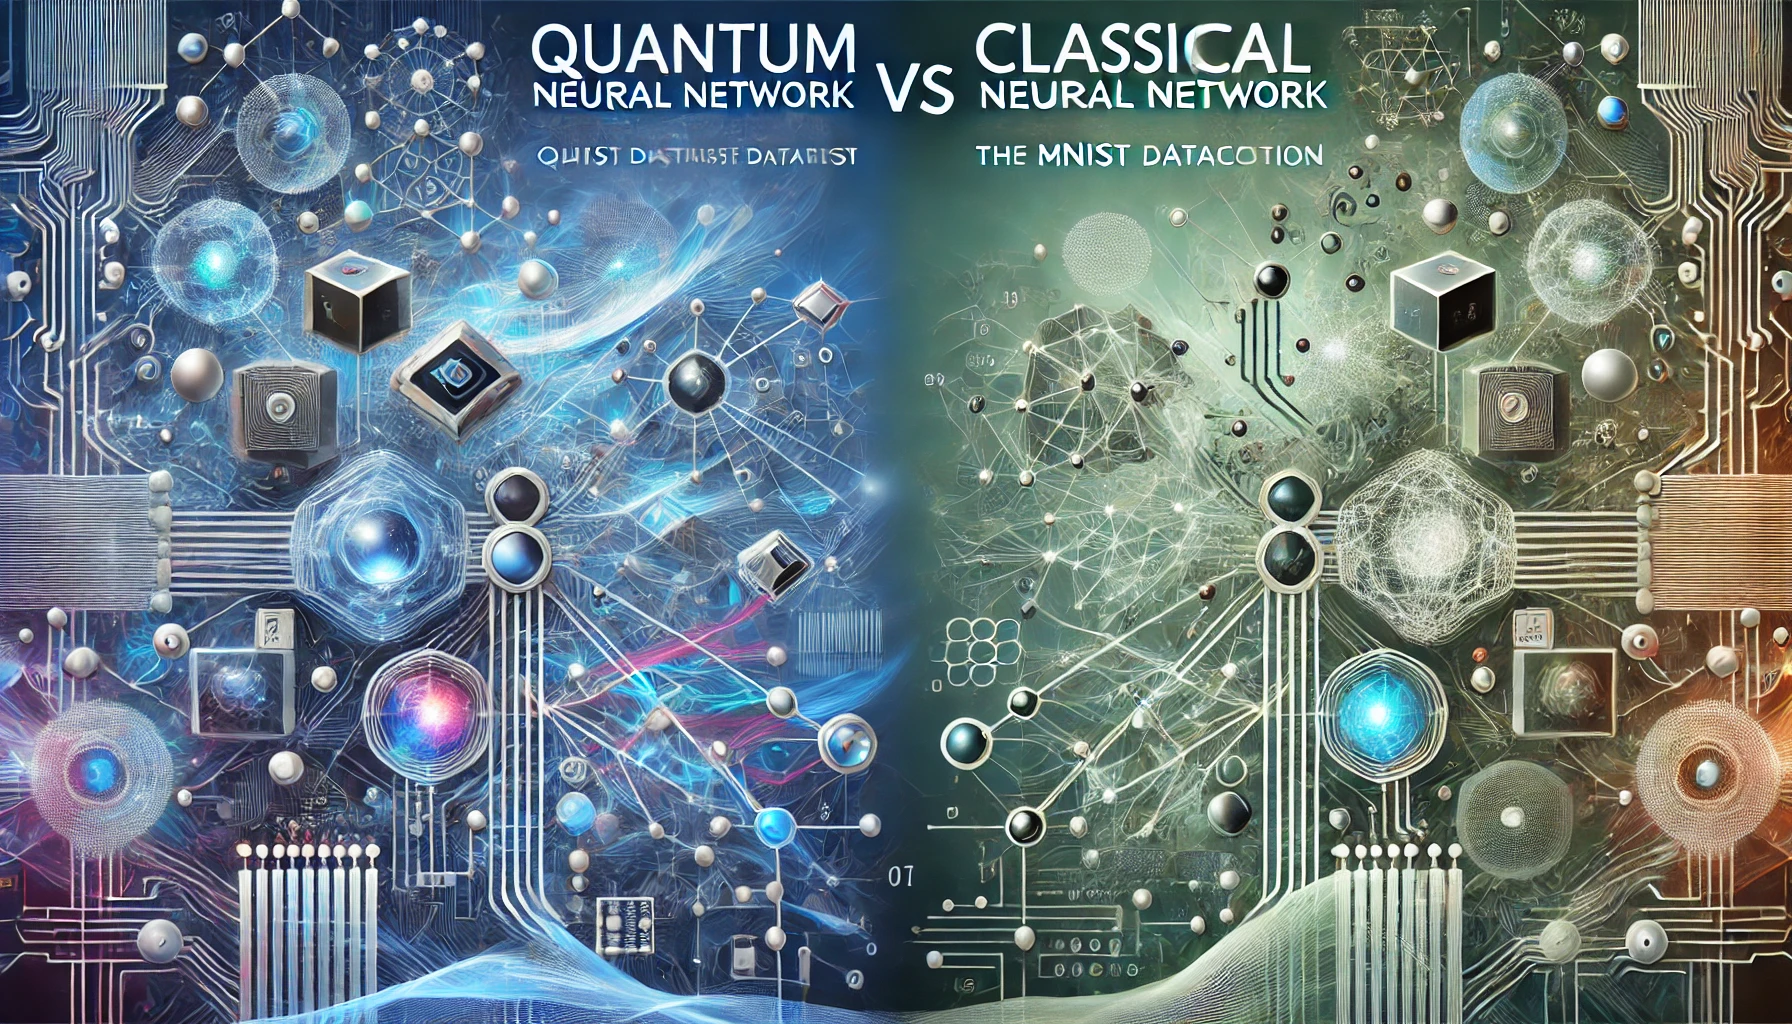

# Problem Statement


The goal of this project is to compare the performance of **Quantum Neural Networks (QNNs)** with **Classical Neural Networks (CNNs)** on a simplified classification problem using the MNIST dataset, specifically for distinguishing between the digits 3 and 6. While quantum computing promises potential advantages in areas like optimization and machine learning, it is important to evaluate whether a QNN can outperform or match classical models when applied to classical data such as images. This project aims to provide insights into the current state of QNNs by comparing their performance to CNNs of similar size and capacity.

---


# Objectives


1. **Implement a Quantum Neural Network (QNN)** using TensorFlow Quantum to classify the digits 3 and 6 from the MNIST dataset.
2. **Develop two Classical Neural Networks (CNNs)** as benchmarks:
   - A **full-sized CNN** that leverages the entire 28x28 pixel resolution.
   - A **smaller CNN** with similar parameter size (~32 parameters) to the QNN for a fair comparison.
3. **Compare the performance** of the quantum and classical models in terms of accuracy and training time.
4. Analyze the results to evaluate the strengths and limitations of QNNs in comparison to CNNs for this task.

---


# Approach

1. **Data Preprocessing**:
   - Use the MNIST dataset but filter the data to only include the digits 3 and 6, which simplifies the problem to binary classification.
   - For the QNN and the smaller CNN, downscale the images from 28x28 to a smaller size (e.g., 4x4) to fit the limited capacity of quantum computers and maintain a fair parameter comparison.

2. **Quantum Neural Network**:
   - Encode the image data into quantum circuits where each pixel corresponds to a qubit.
   - Use TensorFlow Quantum to create a parameterized quantum circuit (PQC) layer and optimize the model using a readout qubit that provides the final classification.

3. **Classical Neural Networks**:
   - **Full CNN**: Construct a CNN using the entire 28x28 images, allowing more filters and layers to leverage high resolution and more parameters.
   - **Fair CNN**: Build a smaller CNN with a similar number of parameters (~32) as the QNN, using downscaled input images.

4. **Model Training**:
   - Train each model (QNN, Full CNN, and Fair CNN) using the training data and measure their performance on the test set.
   - Use hinge loss for the QNN and smaller CNN models, with Binary Crossentropy for the full CNN.

5. **Performance Evaluation**:
   - Measure the accuracy of each model on the test set.
   - Compare training times to assess computational efficiency.

---

# Initial Setup

In [1]:
! pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
! pip install tensorflow-quantum==0.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 101.4 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2


In [3]:
# Update package resources to account for version changes.
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py'>

In [4]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np
import seaborn as sns
import collections

%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

# Load the Dataset

In this tutorial, you will develop a binary classifier to differentiate between the digits 3 and 6, inspired by the approach described in [Farhi et al.](https://arxiv.org/pdf/1802.06002.pdf). This section will guide you through the data handling process, which includes the following steps:

- **Loading the Dataset**: The raw data is retrieved using Keras.
- **Filtering the Dataset**: The dataset is narrowed down to include only the digits 3 and 6.
- **Image Downscaling**: The images are resized to make them suitable for use in a quantum computer.
- **Contradictory Example Removal**: Any conflicting or mislabeled examples are identified and removed from the dataset.
- **Conversion to Cirq Circuits**: The binary images are converted into quantum circuits using the Cirq framework.
- **Conversion to TensorFlow Quantum Circuits**: Finally, the Cirq circuits are transformed into TensorFlow Quantum circuits for further processing.

Each of these steps is crucial to preparing the data for quantum machine learning.

## Load the Raw Data

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Rescale the Images

In [6]:
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


### Filtering 3s and 6s

Filter the dataset to retain only the instances corresponding to the digits 3 and 6, while discarding all other digit classes. Simultaneously, transform the target labels, `y`, into boolean values where the label for digit 3 is set to `True` and the label for digit 6 is set to `False`. This ensures that the dataset is simplified and properly labeled for the binary classification task.

In [7]:
def filter_3_6(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x, y

In [8]:
x_train, y_train = filter_3_6(x_train, y_train)
x_test, y_test = filter_3_6(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 12049
Number of filtered test examples: 1968


### First Example

In [10]:
print(y_train[0])

True


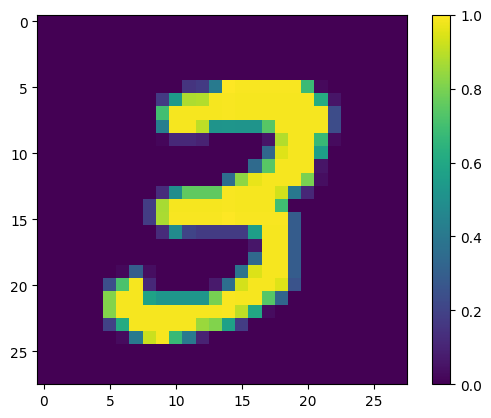

In [11]:
plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

## Downscale the Images

The original image size of 28x28 pixels is far too large for the capabilities of current quantum computers. To make the data more manageable and suitable for quantum processing, reduce the image dimensions to 4x4 pixels. This downscaling retains essential information while ensuring that the image can fit within the constraints of quantum hardware.

In [12]:
x_train_small = tf.image.resize(x_train, (4,4)).numpy()
x_test_small = tf.image.resize(x_test, (4,4)).numpy()

### First Example

In [13]:
print(y_train[0])

True


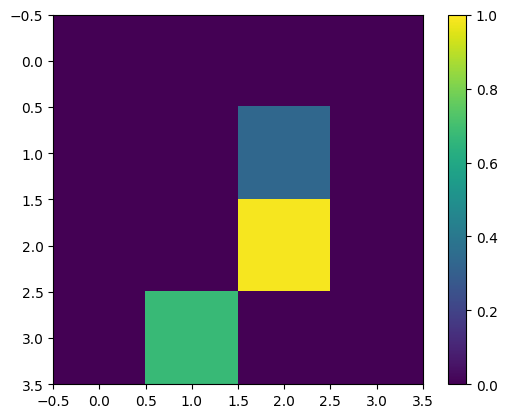

In [14]:
plt.imshow(x_train_small[0,:,:,0], vmin=0, vmax=1)
plt.colorbar()

## Remove the Contradictory Examples

Following the methodology outlined in section *3.3 Learning to Distinguish Digits* of [Farhi et al.](https://arxiv.org/pdf/1802.06002.pdf), filter the dataset to eliminate any images that are labeled as belonging to both digit classes. While this is not a conventional approach in typical machine-learning practices, it is implemented here to stay consistent with the paper's approach. This step ensures that any contradictory examples, which could confuse the model, are removed from the dataset.

In [15]:
def remove_contradicting(xs, ys):
    mapping = collections.defaultdict(set)

    orig_x = {}

    for x,y in zip(xs,ys):
       orig_x[tuple(x.flatten())] = x
       mapping[tuple(x.flatten())].add(y)

    new_x = []
    new_y = []

    for flatten_x in mapping:
      x = orig_x[flatten_x]
      labels = mapping[flatten_x]
      if len(labels) == 1:
          new_x.append(x)
          new_y.append(next(iter(labels)))
      else:
          pass

    num_uniq_3 = sum(1 for value in mapping.values() if len(value) == 1 and True in value)
    num_uniq_6 = sum(1 for value in mapping.values() if len(value) == 1 and False in value)
    num_uniq_both = sum(1 for value in mapping.values() if len(value) == 2)

    print("Number of unique images:", len(mapping.values()))
    print("Number of unique 3s: ", num_uniq_3)
    print("Number of unique 6s: ", num_uniq_6)
    print("Number of unique contradicting labels (both 3 and 6): ", num_uniq_both)
    print()
    print("Initial number of images: ", len(xs))
    print("Remaining non-contradicting unique images: ", len(new_x))

    return np.array(new_x), np.array(new_y)

The resulting counts after filtering do not exactly align with the values reported in the paper, likely due to the fact that the specific procedure for this filtering process is not clearly outlined.

It is important to note that filtering out contradictory examples at this stage does not entirely prevent the model from encountering conflicting training data. This is because the upcoming step involves binarizing the data, which could lead to additional collisions or overlaps in the dataset, further complicating the classification process.

In [16]:
x_train_nocon, y_train_nocon = remove_contradicting(x_train_small, y_train)

Number of unique images: 10387
Number of unique 3s:  4912
Number of unique 6s:  5426
Number of unique contradicting labels (both 3 and 6):  49

Initial number of images:  12049
Remaining non-contradicting unique images:  10338


## Encode the Data as Quantum Circuits

To enable image processing on a quantum computer, [Farhi et al.](https://arxiv.org/pdf/1802.06002.pdf) proposed representing each pixel as a qubit, where the qubit's state is determined by the pixel's value. The initial step in this process is to convert the image data into a binary encoding. This encoding translates the pixel values into a format that can be effectively represented by qubits, preparing the data for quantum operations.

In [17]:
THRESHOLD = 0.5

In [18]:
x_train_bin = np.array(x_train_nocon > THRESHOLD, dtype=np.float32)
x_test_bin = np.array(x_test_small > THRESHOLD, dtype=np.float32)

If contradictory images were removed at this stage, the dataset would be reduced to only 193 examples, which is likely insufficient for effective training. A dataset this small would limit the model's ability to generalize and could lead to overfitting, ultimately reducing the performance and accuracy of the classifier.

In [19]:
_ = remove_contradicting(x_train_bin, y_train_nocon)

Number of unique images: 193
Number of unique 3s:  80
Number of unique 6s:  69
Number of unique contradicting labels (both 3 and 6):  44

Initial number of images:  10338
Remaining non-contradicting unique images:  149


Qubits corresponding to pixel indices with values that exceed a predefined threshold are rotated via an $X$ gate. This operation flips the qubit from its initial state, typically $|0\rangle$, to $|1\rangle$, depending on the pixel's value. The thresholding ensures that only certain pixel qubits, those with significant values, undergo this transformation, encoding the image's information into quantum states.

In [23]:
def convert_to_circuit(image):
    """Encode truncated classical image into quantum datapoint."""
    values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(4, 4)
    circuit = cirq.Circuit()

    for i, value in enumerate(values):
        if value:
            circuit.append(cirq.X(qubits[i]))

    return circuit

In [21]:
x_train_circ = [convert_to_circuit(x) for x in x_train_bin]
x_test_circ = [convert_to_circuit(x) for x in x_test_bin]

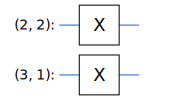

In [24]:
SVGCircuit(x_train_circ[0])

The quantum circuit shown in the image represents a simplified quantum encoding of an image after it has been converted into qubits. Let's break down the key aspects of the circuit:

1. **Qubit Representation**: Each pixel in the image is represented by a qubit. The pixel indices, such as (2,2) and (3,1), refer to the position of the pixel in the original downscaled image (4x4 in this case). These qubits are initialized in a standard state $|0\rangle$.

2. **$X$ Gate Application**: An $X$ gate is applied to the qubits corresponding to pixel positions where the image value exceeds a certain threshold. The $X$ gate (also known as a "NOT" gate) flips the state of the qubit from $|0\rangle$ to $|1\rangle$. This means that pixels with intensities above the threshold are encoded in the quantum circuit by flipping the respective qubits.

3. **Pixel Thresholding**: The positions of the $X$ gates in this circuit are at indices (2,2) and (3,1), indicating that these pixel locations in the image have values that exceeded the predefined threshold, leading to the application of the $X$ gate at these positions.

In summary, this circuit encodes the binary information of a downscaled image (to 4x4) using qubits, with qubits flipped via $X$ gates at pixel positions where the image intensity surpasses a given threshold. This forms the basis for quantum image processing, as the pixel information is now stored in a quantum state.

### Compare the Circuit to the Indices where the image value exceeds the threshold:

In [25]:
bin_img = x_train_bin[0,:,:,0]
indices = np.array(np.where(bin_img)).T
indices

array([[2, 2],
       [3, 1]])

### Convert these `Cirq` Circuits to Tensors for `tfq`:

In [26]:
x_train_tfcirc = tfq.convert_to_tensor(x_train_circ)
x_test_tfcirc = tfq.convert_to_tensor(x_test_circ)

# Quantum Neural Network

There is limited guidance on how to structure a quantum circuit specifically designed for image classification. However, the classification process is based on the expectation value of the readout qubit. In their approach, [Farhi et al.](https://arxiv.org/pdf/1802.06002.pdf) suggest using two-qubit gates, ensuring that the readout qubit is always involved in the operations. This approach is somewhat analogous to running a small [Unitary Recurrent Neural Network (RNN)](https://arxiv.org/abs/1511.06464) over the image pixels. The idea is that by repeatedly acting on the readout qubit with two-qubit gates, the circuit can efficiently capture relevant patterns in the image, similar to how a unitary RNN processes sequential data by updating hidden states step by step.

## Build the Model Circuit

### Single-Layered Quantum Model

The following example demonstrates a layered approach to building a quantum circuit. In this method, each layer consists of *n* instances of the same quantum gate, where *n* represents the number of data qubits. In each layer, every data qubit interacts with the readout qubit by applying these gates.

To implement this, we'll start by defining a simple class. This class will be responsible for adding a layer of gates to the circuit, where each gate involves a data qubit interacting with the readout qubit. Each qubit in the dataset will have an opportunity to act upon the readout qubit through these gates, forming the building blocks for quantum image classification.

This approach systematically applies layers of quantum gates, allowing for the accumulation of information from the image data into the readout qubit, which is later used for classification.

In [27]:
class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout

    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)

In [28]:
demo_builder = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(4,1),
                                   readout = cirq.GridQubit(-1,-1))

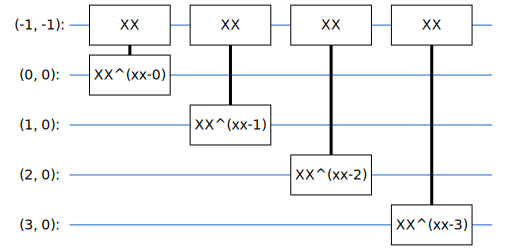

In [29]:
circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate = cirq.XX, prefix='xx')
SVGCircuit(circuit)

The quantum circuit displayed in the image uses a layered structure in which two-qubit gates (specifically, the `XX` gates) are applied between data qubits and the readout qubit. Here’s a breakdown of the circuit:

1. **Qubits**:
   - The qubits are arranged in a vertical layout, with qubits labeled by indices such as (0, 0), (1, 0), (2, 0), and (3, 0). These indices represent the qubits that correspond to different data points in the input image.
   - Additionally, there is a qubit labeled (-1, -1), which likely serves as the **readout qubit**. This qubit is responsible for accumulating the results from the data qubits and will be measured at the end of the circuit to determine the classification.

2. **XX Gates**:
   - The circuit primarily consists of `XX` gates, a common two-qubit gate that performs an interaction between pairs of qubits. In this case, each of the data qubits (like (0, 0), (1, 0), etc.) interacts with the readout qubit via these `XX` gates.
   - These gates are denoted in the circuit with the notation `XX^(xx-i)` where "i" corresponds to the index of the qubit that interacts with the readout qubit. The `XX` gate acts similarly to a controlled operation, where both qubits' states are entangled or correlated.

3. **Layered Structure**:
   - The gates are applied in a layered manner. Each layer consists of multiple `XX` gates applied to the different data qubits, all acting on the same readout qubit.
   - This structure allows the readout qubit to gather information from all data qubits sequentially, accumulating the necessary information for the final measurement.

4. **Purpose**:
   - The purpose of the `XX` gates is to entangle the data qubits with the readout qubit, allowing the circuit to capture relationships between the pixel values of the image and encode them into the quantum state.
   - After applying several layers of these gates, the readout qubit will hold information that can be used to classify the input image based on its expectation value after measurement.

In summary, this circuit applies layers of `XX` gates between each data qubit and the readout qubit, progressively entangling the data into the readout qubit. This structure is designed to enable the quantum circuit to perform a classification task by encoding image information in the qubits' quantum states.

### Two-Layered Quantum Model

Next, we will construct a two-layered quantum model that matches the size of the data and quantum circuit. This model will include the necessary steps for preparing the quantum states and implementing the readout operations.

1. **Layered Circuit Design**:
   - The model will consist of **two layers**, each with a set of gates applied between the data qubits and the readout qubit. Each layer will include interactions using two-qubit gates, such as `XX` gates, ensuring that every data qubit has an opportunity to interact with the readout qubit across the layers.
   
2. **Data Circuit Matching**:
   - The size of the circuit will be configured to match the number of data qubits required to represent the input dataset, ensuring that each pixel (or feature) from the input data is mapped to a corresponding qubit.
   - For example, if the input data is an image downscaled to 4x4 pixels, there will be 16 qubits representing the data (one qubit for each pixel) along with a readout qubit. These 16 data qubits will be involved in the two-layer quantum circuit.

3. **State Preparation**:
   - Before the layers are applied, the data qubits need to be initialized into appropriate quantum states based on the input data. Typically, this involves applying rotations or gate operations to map the classical data (like pixel values) onto quantum states, possibly using `RX` or `RY` gates depending on the encoding scheme.
   - The readout qubit will also be initialized, usually starting in the \(|0\rangle\) state.

4. **Two-Layer Model**:
   - In the first layer, each data qubit will interact with the readout qubit via a two-qubit gate (e.g., an `XX` gate). This entangles the data qubits with the readout qubit, allowing information from the input data to be progressively captured.
   - In the second layer, the process will be repeated, further refining the interaction between the data qubits and the readout qubit, enhancing the entanglement and ensuring that more complex relationships within the data are captured.

5. **Readout Operation**:
   - After the two layers have been applied, the **readout operation** will take place. This involves measuring the readout qubit to extract the final classification result. The measurement will be based on the expectation value of the readout qubit, which reflects the accumulated information from the two layers.
   - The result of this readout operation will be used to classify the input data, with the outcome determining whether the input belongs to one class or another.

By constructing this two-layer quantum model, the circuit will be well-suited to process the input data, leveraging the entanglement between the data and readout qubits to perform effective classification. The inclusion of state preparation and readout operations ensures that the model is fully functional from input to output, capable of processing data and generating a result.

In [30]:
def create_quantum_model():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(4, 4)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()

    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    # Then add layers (experiment by adding more).
    builder.add_layer(circuit, cirq.XX, "xx1")
    builder.add_layer(circuit, cirq.ZZ, "zz1")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [31]:
model_circuit, model_readout = create_quantum_model()

## Wrap the Model-Circuit into a tfq-keras Model

To build a machine learning model using Keras that incorporates quantum components, you will integrate a "Parametrized Quantum Circuit" (PQC) layer provided by TensorFlow Quantum (`tfq.layers.PQC`). This model is designed to operate on "quantum data" derived from the classical data, encoded as quantum circuits in `x_train_circ`. Here’s a step-by-step expansion on how to create this model:

1. **Quantum Data Preparation**:
   - The classical data, such as images, are first converted into quantum circuits, with each circuit representing a piece of data. This conversion is stored in `x_train_circ`. Each circuit encodes the respective image's information in a way that a quantum computer can process.

2. **Using TensorFlow Quantum**:
   - TensorFlow Quantum (TFQ) provides tools for integrating quantum computing with machine learning models. The `tfq.layers.PQC` layer allows you to define a parameterized quantum circuit that can be optimized during the training process, much like weights are optimized in a traditional neural network.

3. **Parameterized Quantum Circuit**:
   - The PQC layer will include a quantum circuit that interacts with the quantum data. The parameters of this circuit (similar to the parameters in a neural network's layers) are adjusted during training to optimize the model's performance.
   - The quantum circuit in the PQC layer is designed to perform operations and measurements that directly relate to the task at hand—in this case, image classification.

4. **Readout Mechanism**:
   - Following the approach proposed by [Farhi et al.](https://arxiv.org/pdf/1802.06002.pdf), the classification decision is made based on the expectation value of a readout qubit within the parameterized circuit. The readout qubit's expectation value, which ranges between -1 and 1, effectively summarizes the outcome of the quantum computation into a single scalar value.
   - This expectation value is then used to determine the class of the input image. The sign of the expectation value (positive or negative) can be interpreted as belonging to one class or another.

5. **Building the Keras Model**:
   - The model is constructed using Keras’ functional or sequential API, incorporating the `PQC` layer. Inputs to this layer are the encoded quantum circuits, and its output is the expectation value of the readout qubit.
   - You can then add additional layers as needed for post-processing the expectation values, such as scaling or thresholding, to map the output directly to classification labels.

6. **Training and Evaluation**:
   - The model is trained using standard machine learning techniques, with the quantum layer’s parameters being adjusted to minimize classification error on a training dataset.
   - After training, the model’s effectiveness is evaluated on a separate test set to ensure that it generalizes well to new, unseen data.

This approach, blending quantum computing with conventional neural network architectures, leverages the unique properties of quantum mechanics to address complex classification tasks in a novel way.

In [32]:
model = tf.keras.Sequential([
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),

    # The PQC layer returns the expected value of the readout gate, range [-1,1].
    tfq.layers.PQC(model_circuit, model_readout)
])

To describe the training procedure for the quantum-enhanced model, we will utilize Keras' `compile` method to configure the optimization process. Since the model's output, which is based on the expectation value of the readout qubit, lies within the range of `[-1, 1]`, it makes sense to use **hinge loss** for optimization. Hinge loss is commonly used in binary classification tasks where outputs are within this range, as it helps the model effectively learn to differentiate between two classes.

***Adjusting for Hinge Loss***

1. **Label Conversion**:
   - Since hinge loss expects target labels to be either `-1` or `1`, we must first convert the boolean labels (`y_train_nocon`) to match this format.
   - For the original boolean labels, `True` (corresponding to class 3) will be converted to `1`, and `False` (corresponding to class 6) will be converted to `-1`. This ensures the labels are aligned with the requirements of hinge loss.

2. **Compiling the Model**:
   - Once the label conversion is complete, you can compile the model using the `compile` method in Keras. This involves specifying:
     - The optimizer (such as Adam or SGD) to adjust the model parameters.
     - The loss function, which in this case will be hinge loss, given that the model outputs values in the range of `[-1, 1]`.
     - Metrics, such as accuracy, to track the model’s performance during training.

***Alternative Approach***

If you prefer to use **Binary Crossentropy** as the loss function instead of hinge loss, the output range of the model can be shifted from `[-1, 1]` to `[0, 1]`. In this setup:
   - The model's output would represent the probability that the input belongs to class 3 (with the value close to 1 indicating class 3, and close to 0 indicating class 6).
   - This approach can be paired with `tf.losses.BinaryCrossentropy` to compute the error based on the predicted probability and the actual class label.

***Summary of Adjustments for Hinge Loss***

To implement hinge loss, two key adjustments are needed:
1. **Convert Labels**: The boolean labels (`y_train_nocon`) should be converted from `True`/`False` to `1` and `-1`, respectively, to match the expected format of hinge loss.
2. **Compile the Model**: Use the Keras `compile` method to define the optimizer, hinge loss as the loss function, and any additional metrics for tracking model performance.

This approach ensures that the model is correctly set up to handle the quantum-enhanced classification task using hinge loss, optimizing based on the output's expected range of `[-1, 1]`. If a different loss function like binary crossentropy is preferred, you can adjust the output and loss configuration accordingly.

### Hinge Accuracy

For this quantum model, since we're using the hinge loss function, the labels (`y_true`) will be in the range of `[-1, 1]`, rather than the typical boolean values (`True` or `False`). This means that the standard `tf.losses.BinaryAccuracy(threshold=0.0)` metric, which is designed for boolean labels, cannot be used directly. Instead, we need to define a custom metric called `hinge_accuracy` that can correctly interpret `[-1, 1]` labels.

***Custom `hinge_accuracy` Metric***

To handle labels in the `[-1, 1]` range and accurately measure classification performance, we need to create a custom metric. The logic for `hinge_accuracy` will be similar to binary accuracy but adapted to hinge loss. Here’s how it works:

1. **Label Conversion**:
   - The model's predicted output will be in the range `[-1, 1]`. We need to compare these predictions against the true labels (`y_true`), which have also been converted to the `[-1, 1]` range (with `1` for class 3 and `-1` for class 6).
   
2. **Thresholding**:
   - Instead of treating predictions as probabilities (where a value greater than 0.5 indicates one class), we set the threshold at `0.0`. A prediction greater than or equal to `0.0` is considered class 3 (label `1`), while a prediction less than `0.0` is considered class 6 (label `-1`).
   
3. **Calculating Accuracy**:
   - For each prediction, we check if it matches the true label. If the prediction’s sign matches the sign of the true label (`y_true`), it is considered correct. For example, if `y_pred >= 0` and `y_true == 1`, or `y_pred < 0` and `y_true == -1`, the prediction is correct.
   
4. **Implementing the Custom Metric**:
   - We can define this custom `hinge_accuracy` function using TensorFlow/Keras to ensure that it can be used as a metric during the model training process. The function will compare the signs of `y_pred` and `y_true`, and return the proportion of correctly predicted samples.

***Summary of Adjustments***

1. **Custom Metric for Hinge Loss**: Since we are using hinge loss and labels are in the range `[-1, 1]`, the custom `hinge_accuracy` metric must check whether the sign of the predicted value matches the true label.
   
2. **Comparison Logic**: The metric will threshold the predicted values at `0.0`, assigning predictions of `1` for values greater than or equal to `0.0` and `-1` for values below `0.0`. It then compares these predicted labels against the true labels to determine accuracy.

This custom `hinge_accuracy` metric will ensure that the accuracy calculation aligns with the hinge loss and the label format used in this model, providing a reliable measure of classification performance during training and evaluation.

In [33]:
y_train_hinge = 2.0*y_train_nocon-1.0
y_test_hinge = 2.0*y_test-1.0

In [34]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [35]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[hinge_accuracy])

In [36]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pqc (PQC)                   (None, 1)                 32        
                                                                 
Total params: 32 (128.00 Byte)
Trainable params: 32 (128.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


The output you provided is a summary of the quantum-enhanced model built using Keras, showing the model’s architecture and parameter count. Let's break it down:

1. **Model Type**:
   - The model is of type `"sequential"`, which means layers are stacked one after another in sequence, a simple architecture often used for straightforward models.

2. **Layer Information**:
   - The model consists of a single layer, labeled `"pqc"`, which stands for **Parametrized Quantum Circuit (PQC)**. This layer is the quantum component of the model that interacts with the quantum data and adjusts its internal parameters during training to optimize performance.
   - The output shape of the PQC layer is `(None, 1)`, indicating that the model produces a single scalar output per example. The `None` in the output shape means that the model can handle an arbitrary batch size (i.e., the number of examples in each training batch is flexible).

3. **Parameters (Param #)**:
   - The model has **32 trainable parameters**. These parameters represent the variables within the quantum circuit (such as angles of rotation gates) that the training process adjusts to minimize the loss and improve classification accuracy.
   - The total size of the trainable parameters is **128 bytes**, which is relatively small because the model's architecture is simple and lightweight, making it computationally efficient.

4. **Total, Trainable, and Non-Trainable Parameters**:
   - **Total parameters**: The model has a total of 32 parameters.
   - **Trainable parameters**: All 32 parameters are trainable, meaning they will be optimized during training.
   - **Non-trainable parameters**: There are no non-trainable parameters, meaning no fixed or unchangeable components in the model.

In summary, this output shows a small, efficient quantum-enhanced model with a PQC layer that has 32 adjustable parameters, designed to handle the classification task.

## Train the Quantum Model

Now, it's time to train the quantum-enhanced model. Typically, this process takes about 45 minutes to complete on the full dataset. However, if you prefer not to wait that long, you can opt to use a smaller subset of the data. By setting `NUM_EXAMPLES=500`, the training process will use only 500 examples, reducing the runtime to approximately 5 minutes.

Although this reduced dataset significantly shortens the training duration, it doesn’t negatively impact the model's ability to learn. The model itself only contains 32 trainable parameters, which means it doesn’t require a large dataset to adequately constrain these parameters. With fewer examples, the model can still make meaningful progress during training, but the process will complete sooner.

Using this subset allows you to observe how the model improves over time by examining the validation logs, where you can see key metrics, such as accuracy and loss, gradually improve. By the end of the training process, even with fewer examples, you will have enough information to evaluate the model's learning progress, ensuring that it is on the right track without requiring the full dataset or extended training time.

In [38]:
EPOCHS = 3
BATCH_SIZE = 32

NUM_EXAMPLES = len(x_train_tfcirc)
NUM_EXAMPLES

10338

In [39]:
x_train_tfcirc_sub = x_train_tfcirc[:NUM_EXAMPLES]
y_train_hinge_sub = y_train_hinge[:NUM_EXAMPLES]

Training this model to convergence should achieve >85% accuracy on the test set.

**Note**: The training accuracy reports the average over the epoch. The validation accuracy is evaluated at the end of each epoch.

In [40]:
qnn_history = model.fit(x_train_tfcirc_sub,
                        y_train_hinge_sub,
                        batch_size=32,
                        epochs=EPOCHS,
                        verbose=1,
                        validation_data = (x_test_tfcirc,
                                           y_test_hinge))

Epoch 1/3
324/324 [==============================] - 883s 3s/step - loss: 0.8112 - hinge_accuracy: 0.6577 - val_loss: 0.5061 - val_hinge_accuracy: 0.7530
Epoch 2/3
324/324 [==============================] - 852s 3s/step - loss: 0.4294 - hinge_accuracy: 0.7973 - val_loss: 0.3882 - val_hinge_accuracy: 0.8942
Epoch 3/3
324/324 [==============================] - 849s 3s/step - loss: 0.3687 - hinge_accuracy: 0.8830 - val_loss: 0.3561 - val_hinge_accuracy: 0.8942


In [41]:
qnn_results = model.evaluate(x_test_tfcirc, y_test)

62/62 [==============================] - 28s 444ms/step - loss: 0.3561 - hinge_accuracy: 0.8942


# Classical Neural Network

While the quantum neural network (QNN) performs reasonably well for the simplified MNIST task involving classifying the digits 3 and 6, a basic classical neural network (CNN) can easily surpass the QNN in terms of performance on this specific task. For example, after just a single training epoch, a classical neural network can achieve an accuracy of over 98% on the validation or holdout set, significantly outpacing the quantum model.

In the following example, a classical neural network is employed to tackle the same 3-vs-6 classification problem. However, instead of downscaling or subsampling the input image (as done in the quantum approach), the classical neural network operates on the full-resolution 28x28 pixel images.

By utilizing the entire image, the classical neural network can more effectively capture patterns and details in the input data. As a result, this network quickly converges during training and achieves near-perfect accuracy on the test set, approaching 100%. This highlights the computational efficiency and performance advantage that classical neural networks have when dealing with relatively straightforward classification problems like this, where quantum models may not yet offer a clear advantage.

In summary, while QNNs provide an exciting new frontier, traditional CNNs still outperform them on many current tasks, particularly in cases where the classical model's architecture and input data resolution allow it to fully exploit the available information.

In [42]:
def create_classical_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1))

    return model

In [43]:
model = create_classical_model()

In [44]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

This output is a summary of a **classical neural network** architecture built using Keras, which includes convolutional and dense layers for image classification. Here's an explanation of each part:

***Model Type***
- **Sequential Model**: This model is built using Keras' sequential API, where layers are added one after the other, forming a linear stack.

***Layer Details***
1. **conv2d (Conv2D)**:
   - **Type**: Convolutional layer
   - **Output Shape**: `(None, 26, 26, 32)` — after applying 32 filters to the input image, the output is 26x26 feature maps for each filter.
   - **Parameters**: 320 — the number of trainable parameters (weights and biases) in this layer. This is calculated as:
     
     (3 x 3 (kernel size) x 1 (input channels)) x 32 (filters) + 32 (biases) = 320

2. **conv2d_1 (Conv2D)**:
   - **Type**: Second convolutional layer
   - **Output Shape**: `(None, 24, 24, 64)` — 64 filters are applied, resulting in 24x24 feature maps for each filter.
   - **Parameters**: 18,496 — calculated as:
   
   (3 x 3 (kernel size) x 32 (input channels from previous layer)) x 64 (filters) + 64 (biases) = 18,496

3. **max_pooling2d (MaxPooling2D)**:
   - **Type**: Max-pooling layer
   - **Output Shape**: `(None, 12, 12, 64)` — reduces the size of each feature map by half (from 24x24 to 12x12) while keeping the number of channels (64).
   - **Parameters**: None — max pooling is a non-parametric operation.

4. **dropout (Dropout)**:
   - **Type**: Dropout layer
   - **Output Shape**: `(None, 12, 12, 64)` — same as input shape. This layer randomly sets some of the activations to zero during training to prevent overfitting.
   - **Parameters**: None — dropout doesn't have any learnable parameters.

5. **flatten (Flatten)**:
   - **Type**: Flatten layer
   - **Output Shape**: `(None, 9216)` — converts the 3D tensor (12x12x64) into a 1D vector of 9216 values to feed into the dense layer.
   - **Parameters**: None — flattening is a reshaping operation, not parametric.

6. **dense (Dense)**:
   - **Type**: Fully connected (dense) layer
   - **Output Shape**: `(None, 128)` — 128 neurons in this layer, which receive input from the flattened vector.
   - **Parameters**: 1,179,776 — calculated as:
    
     9216(input units) x 128(neurons) + 128 (biases) = 1,179,776

7. **dropout_1 (Dropout)**:
   - **Type**: Dropout layer
   - **Output Shape**: `(None, 128)` — same as the input shape, for regularization.
   - **Parameters**: None.

8. **dense_1 (Dense)**:
   - **Type**: Output layer
   - **Output Shape**: `(None, 1)` — single neuron output for binary classification (e.g., classifying between two categories, such as digits 3 and 6).
   - **Parameters**: 129 — calculated as:

     128 (inputunits) ×1 (neuron)+1 (bias)=129

***Total Parameters***
- **Total params**: 1,198,721 — the total number of trainable parameters in the model.
- **Trainable params**: 1,198,721 — all the parameters in this model are trainable.
- **Non-trainable params**: 0 — there are no non-trainable parameters in this model.

***Summary***
This model has two convolutional layers for feature extraction, followed by max-pooling and dropout for downsampling and regularization. The data is then flattened and passed through a fully connected dense layer, followed by dropout again for regularization, before reaching the output layer. The model is lightweight yet powerful enough to handle image classification tasks efficiently.

## Train the Model

In [46]:
model.fit(x_train,
          y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test,
                           y_test))

95/95 [==============================] - 7s 18ms/step - loss: 0.0449 - accuracy: 0.9827 - val_loss: 0.0055 - val_accuracy: 0.9990


## Evaluate the Model

In [47]:
cnn_results = model.evaluate(x_test, y_test)

62/62 [==============================] - 1s 6ms/step - loss: 0.0055 - accuracy: 0.9990


The above model has nearly 1.2M parameters. For a more fair comparison, try a 37-parameter model, on the subsampled images:

# Fair Classical Model

In [48]:
def create_fair_classical_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(4,4,1)))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    model.add(tf.keras.layers.Dense(1))

    return model

In [49]:
model = create_fair_classical_model()

In [50]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


This is a summary of a **37-parameter neural network model** built using Keras, designed to be lightweight and comparable to a quantum neural network. Let’s break down each layer and its corresponding parameters:

***Model Type***
- **Sequential Model**: This model is built using the sequential API in Keras, where layers are stacked in a linear fashion.

***Layer Details***

1. **Flatten Layer** (`flatten_1`):
   - **Type**: Flatten
   - **Output Shape**: `(None, 16)` — The `Flatten` layer converts the input (likely a 4x4 subsampled image, totaling 16 pixels) into a 1D vector with 16 elements.
   - **Parameters**: 0 — Flattening is a reshaping operation that does not involve learnable parameters.

2. **Dense Layer** (`dense_2`):
   - **Type**: Fully connected (dense) layer
   - **Output Shape**: `(None, 2)` — This layer has 2 neurons, taking the 16-element flattened input and outputting 2 values.
   - **Parameters**: 34 — Calculated as:
   
   16 (input units) x 2 (neurons) + 2 (biases) = 34
   - This layer captures basic relationships between the 16 input features and the 2 output neurons.

3. **Dense Layer** (`dense_3`):
   - **Type**: Output dense layer
   - **Output Shape**: `(None, 1)` — A single neuron output, used for binary classification.
   - **Parameters**: 3 — Calculated as:
   
   2 (input units from the previous layer) x 1 (neuron) + 1 (bias) = 3
   - This layer produces the final classification result, outputting a single value for binary decision-making (e.g., classifying between 3 and 6).

***Total Parameters***
- **Total params**: 37 — The model has a total of 37 trainable parameters, making it lightweight and comparable to quantum models.
- **Trainable params**: 37 — All parameters are trainable, meaning they will be adjusted during the training process.
- **Non-trainable params**: 0 — There are no fixed or non-trainable parameters in this model.

***Summary***
- This is a minimalistic neural network with only two fully connected layers. The input (likely a subsampled 4x4 image) is flattened into a vector of 16 features, passed through a hidden layer with 2 neurons, and then passed through an output layer with 1 neuron for binary classification.
- With only **37 parameters**, this model is designed to be extremely compact, while still being able to perform basic classification tasks. It's well-suited for comparison to quantum neural networks, which often have similarly low parameter counts.

## Train the Model

In [52]:
model.fit(x_train_bin,
          y_train_nocon,
          batch_size=128,
          epochs=20,
          verbose=2,
          validation_data=(x_test_bin, y_test))

Epoch 1/20
81/81 - 2s - loss: 0.7083 - accuracy: 0.5147 - val_loss: 0.6825 - val_accuracy: 0.5112 - 2s/epoch - 31ms/step
Epoch 2/20
81/81 - 0s - loss: 0.6727 - accuracy: 0.5840 - val_loss: 0.6597 - val_accuracy: 0.5584 - 340ms/epoch - 4ms/step
Epoch 3/20
81/81 - 0s - loss: 0.6398 - accuracy: 0.6497 - val_loss: 0.6212 - val_accuracy: 0.6001 - 375ms/epoch - 5ms/step
Epoch 4/20
81/81 - 0s - loss: 0.5930 - accuracy: 0.6799 - val_loss: 0.5657 - val_accuracy: 0.6265 - 361ms/epoch - 4ms/step
Epoch 5/20
81/81 - 0s - loss: 0.5290 - accuracy: 0.7332 - val_loss: 0.4824 - val_accuracy: 0.7256 - 397ms/epoch - 5ms/step
Epoch 6/20
81/81 - 0s - loss: 0.4427 - accuracy: 0.8012 - val_loss: 0.4031 - val_accuracy: 0.8105 - 350ms/epoch - 4ms/step
Epoch 7/20
81/81 - 0s - loss: 0.3749 - accuracy: 0.8468 - val_loss: 0.3470 - val_accuracy: 0.8115 - 341ms/epoch - 4ms/step
Epoch 8/20
81/81 - 0s - loss: 0.3286 - accuracy: 0.8594 - val_loss: 0.3085 - val_accuracy: 0.8501 - 386ms/epoch - 5ms/step
Epoch 9/20
81/81 -

## Evaluate the Model

In [53]:
fair_nn_results = model.evaluate(x_test_bin, y_test)

62/62 [==============================] - 0s 4ms/step - loss: 0.2189 - accuracy: 0.9162


# Comparison

When the input data is of higher resolution and a more powerful convolutional neural network (CNN) is used, this classification problem becomes straightforward for the classical model. In fact, even a classical neural network with a similar parameter count (around 32 parameters) can achieve comparable accuracy in significantly less time.

No matter how the model is structured, classical neural networks consistently outperform quantum neural networks when working with classical data, such as images. This is because classical models are highly optimized for such tasks, benefiting from years of development and efficient architectures like CNNs. These models can extract intricate features from high-resolution data and converge quickly during training, making them more efficient for tasks like image classification.

In contrast, quantum neural networks, while promising for future applications, currently struggle to match the performance of classical models on tasks involving classical data. The computational overhead of quantum models, along with limitations in current quantum hardware, makes it challenging for them to compete with classical neural networks in terms of both accuracy and training time. As a result, for classical data, a well-constructed classical neural network is often the superior choice, offering better performance and faster results.

<ipython-input-57-bc9e518ab468>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Quantum", "Classical, full", "Classical, fair"],


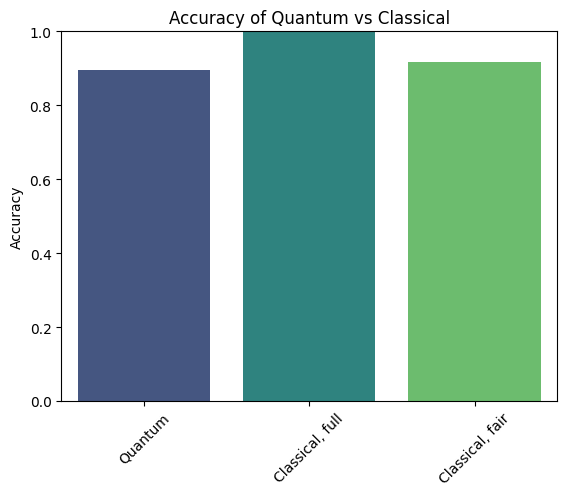

In [57]:
qnn_accuracy = qnn_results[1]
cnn_accuracy = cnn_results[1]
fair_nn_accuracy = fair_nn_results[1]

sns.barplot(x=["Quantum", "Classical, full", "Classical, fair"],
            y=[qnn_accuracy, cnn_accuracy, fair_nn_accuracy],
            palette = 'viridis')
plt.ylabel("Accuracy")
plt.ylim([0,1])
plt.title("Accuracy of Quantum vs Classical")
plt.xticks(rotation=45)
plt.show()

This bar plot compares the accuracy of different models in solving a classification problem, likely the 3-vs-6 digit classification task discussed earlier. The models include:

1. **Quantum Model**: This represents the accuracy achieved by a quantum neural network (QNN) on the given task. The bar shows an accuracy close to 0.9 or 90%, indicating decent performance for a quantum model.

2. **Classical, full**: This refers to a classical neural network (CNN) trained with the full input data, likely the original 28x28 images. The bar indicates that this model achieves near-perfect accuracy (around 100%). This highlights the superior performance of a more powerful classical model that can leverage the full resolution of the input data.

3. **Classical, fair**: This represents a classical neural network with a reduced parameter count (around 37 parameters) to make a fair comparison with the quantum model. The bar shows that this smaller classical model still performs very well, with an accuracy around 90%, though it may be slightly lower than the quantum model.

# Conclusion

The comparison between Quantum Neural Networks (QNNs) and Classical Neural Networks (CNNs) reveals several important insights:
1. **Classical Neural Networks outperform Quantum Neural Networks** when applied to classical data like images. The **Full CNN** leveraging the complete 28x28 resolution achieves near-perfect accuracy (close to 100%) on the classification task, showcasing the efficiency of CNNs when given high-resolution data and more parameters.
   
2. Even when the classical neural network is constrained to a similar parameter size as the quantum model (in the **Fair CNN**), it still performs competitively with an accuracy of around 90%, demonstrating the robustness of classical models even with fewer resources.

3. While the **QNN** reaches about 90% accuracy, it is slower to train and does not outperform the classical models in this context. This suggests that, for **classical data tasks** such as image classification, classical neural networks are still more effective and efficient than quantum neural networks.

This project highlights the current limitations of QNNs and emphasizes the continued dominance of classical approaches for solving machine learning problems with classical data. While quantum models hold promise for future developments, classical models remain the preferred choice for tasks like image classification at this stage.